# Customer Segmentation

### Data Preprocessing
### I. RFM Analysis

### II. K-Means Clustering

### III. Metrics for Evaluating K-Means Clustering

### Elbow Method 
### Silhouette Score


In [47]:
import os
import warnings
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# import missingno as no
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, message=".*n_init.*")

### Load Data

In [48]:
data  = pd.read_excel('Online Retail.xlsx')

In [49]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [50]:
f=data['CustomerID'].nunique()
print("Number of Unique customers :",f)

Number of Unique customers : 4372


### Number of Unique customers : 4372

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [52]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [53]:
print(f'Percentage of missing data from CustomerID column is: {round(data.CustomerID.isna().sum() / data.shape[0] *100,2)}%')

Percentage of missing data from CustomerID column is: 24.93%


In [54]:
data['Description'].fillna('No Description', inplace=True)

In [55]:
data['Description'].isna().sum()

0

Data Cleaning

In [56]:
df = data.dropna()
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [57]:
df['Quantity'] = df['Quantity'].abs()

C:\Users\nitin\AppData\Local\Temp\ipykernel_20868\2038587808.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
df.drop(df[df['UnitPrice'] == 0].index, axis=0, inplace=True)

C:\Users\nitin\AppData\Local\Temp\ipykernel_20868\2711867798.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Feature Engineering

In [59]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()

C:\Users\nitin\AppData\Local\Temp\ipykernel_20868\1859189470.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [60]:
df.count()

InvoiceNo      406789
StockCode      406789
Description    406789
Quantity       406789
InvoiceDate    406789
UnitPrice      406789
CustomerID     406789
Country        406789
TotalPrice     406789
dtype: int64

In [61]:
df.to_excel('clean.xlsx',index=False)

### RFM analysis

In [62]:
most_recent_date = df['InvoiceDate'].max()
print(most_recent_date)
customer_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (most_recent_date - x.max()).days,
                                            'InvoiceNo': 'count',
                                            'TotalPrice': 'sum'})

customer_df.rename(columns={'InvoiceDate':'Recency', 'InvoiceNo':'Frequency', 'TotalPrice':'Monetary'}, inplace=True)
customer_df.head(5)

2011-12-09 12:50:00


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,2,154367.20
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40


In [63]:
customer_df[customer_df.index==14796.0]

,Recency,Frequency,Monetary
CustomerID,,,
14796.0,0,1165,8205.47


In [64]:
customer_df.describe()

,Recency,Frequency,Monetary
count,4371.000000,4371.000000,4371.000000
mean,91.064974,93.065431,2178.620452
std,100.770046,232.463777,10503.405397
min,0.000000,1.000000,1.250000
25%,16.000000,17.000000,308.760000
50%,49.000000,42.000000,678.010000
75%,142.000000,102.000000,1696.910000
max,373.000000,7983.000000,336942.100000


In [65]:
customer_df.shape

(4371, 3)

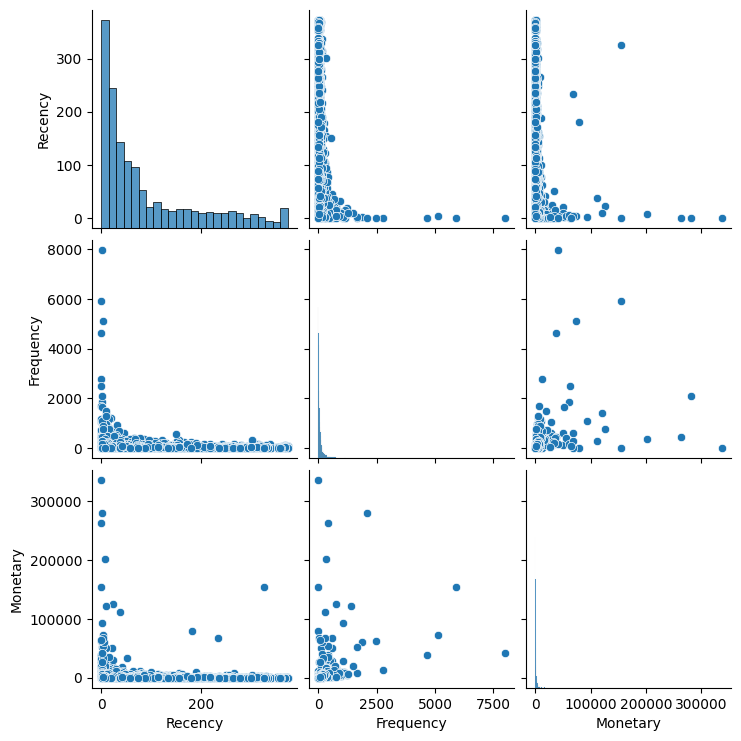

In [66]:
sns.pairplot(customer_df)

In [67]:
scaler = StandardScaler()
norm_df = scaler.fit_transform(customer_df)
norm_df

array([[ 2.32173944e+00, -3.91785125e-01,  1.44911089e+01],
       [-8.93869573e-01,  3.82617649e-01,  2.02945932e-01],
       [-1.69365072e-01, -2.67020234e-01, -3.63143258e-02],
       ...,
       [-8.34321258e-01, -3.44460512e-01, -1.90352471e-01],
       [-8.74020134e-01,  2.85210205e+00, -7.97360753e-03],
       [-4.86956086e-01, -9.92329664e-02, -3.25017927e-02]])

### K-means Clustering 

KMeans(max_iter=50, n_clusters=2, n_init=10)
For n_clusters=2, the Elbow score is 9114.415733346275
KMeans(max_iter=50, n_clusters=3, n_init=10)
For n_clusters=3, the Elbow score is 5552.277937331231
KMeans(max_iter=50, n_clusters=4, n_init=10)
For n_clusters=4, the Elbow score is 3945.2549017207984
KMeans(max_iter=50, n_clusters=5, n_init=10)
For n_clusters=5, the Elbow score is 2952.6822542617756
KMeans(max_iter=50, n_clusters=6, n_init=10)
For n_clusters=6, the Elbow score is 2324.8513025551165
KMeans(max_iter=50, n_clusters=7, n_init=10)
For n_clusters=7, the Elbow score is 1864.412060948846
KMeans(max_iter=50, n_init=10)
For n_clusters=8, the Elbow score is 1590.0719750620879


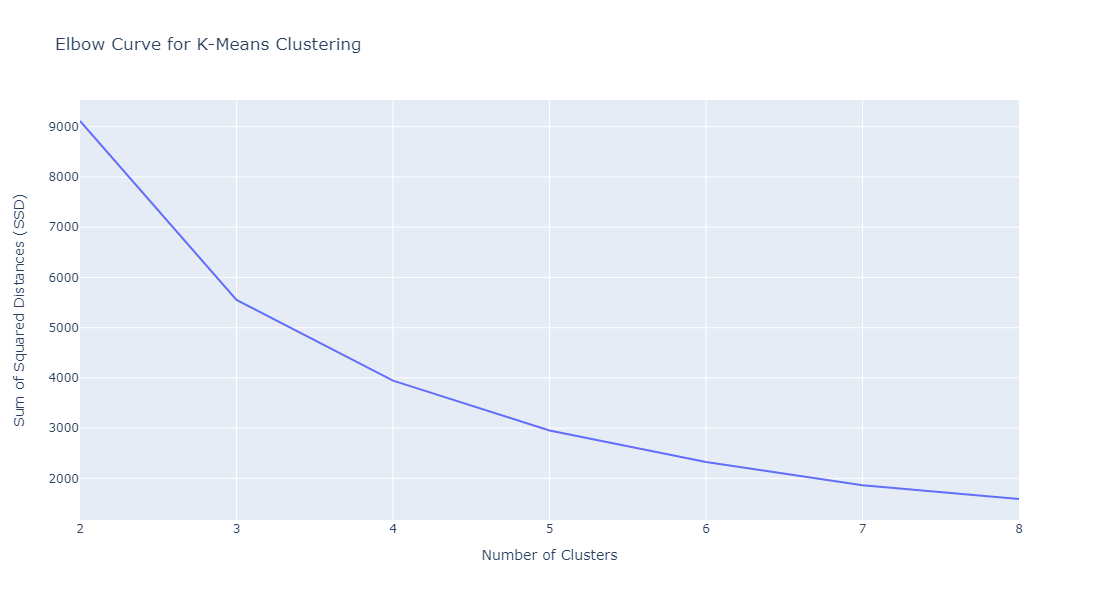

In [68]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,n_init=10)
    print(kmeans)
    kmeans.fit(norm_df)
    
    ssd.append(kmeans.inertia_)
    print("For n_clusters={0}, the Elbow score is {1}".format(num_clusters, kmeans.inertia_))

fig = px.line(x=range_n_clusters, y=ssd, 
              title="Elbow Curve for K-Means Clustering",
              labels={'x': 'Number of Clusters', 'y': 'Sum of Squared Distances (SSD)'})

fig.update_layout(
    xaxis=dict(title_font=dict(size=14)),
    yaxis=dict(title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)

fig.show()

In [69]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,n_init=10)
    kmeans.fit(norm_df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(norm_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.9275224510975527
For n_clusters=3, the silhouette score is 0.6056901708903776
For n_clusters=4, the silhouette score is 0.604850288533439
For n_clusters=5, the silhouette score is 0.6139557870768777
For n_clusters=6, the silhouette score is 0.589522827741621
For n_clusters=7, the silhouette score is 0.5289575775976862
For n_clusters=8, the silhouette score is 0.5080673191729393


In [70]:
final_kmeans = KMeans(n_clusters=3,random_state=42)
final_kmeans.fit(norm_df)

KMeans(n_clusters=3, random_state=42)

In [71]:
final_df = pd.DataFrame(customer_df, columns=customer_df.columns, index=customer_df.index)
final_df['Cluster'] = final_kmeans.labels_ + 1 
final_df.head(10)

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346.0,325,2,154367.20,3
12347.0,1,182,4310.00,2
12348.0,74,31,1797.24,2
12349.0,18,73,1757.55,2
12350.0,309,17,334.40,1
12352.0,35,95,3466.67,2
12353.0,203,4,89.00,1
12354.0,231,58,1079.40,1
12355.0,213,13,459.40,1


In [72]:
final_kmeans.labels_ 

array([2, 1, 1, ..., 1, 1, 1])

In [73]:
final_df.groupby('Cluster').agg({'Monetary':'mean',
                                 'Frequency':'mean',
                                 'Recency':'mean'})

,Monetary,Frequency,Recency
Cluster,,,
1,561.131089,27.753199,246.232176
2,2081.217484,104.846413,39.318210
3,141329.410000,2294.533333,27.400000


### SUMMARY
##### cluster 1:Low-Value Occasional Customers
##### cluster 2 : High-Value customers
##### cluster 3: High-Value regular Customers

{2: 3262, 1: 1094, 3: 15}


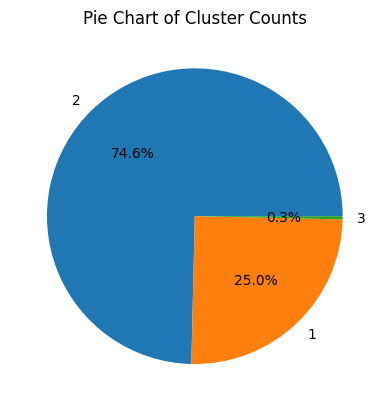

In [74]:
import pandas as pd

cluster_labels = final_df.Cluster.value_counts().to_dict()
print(cluster_labels)
# Get the pie slice labels and values
pie_slice_labels = list(cluster_labels.keys())
pie_slice_values = list(cluster_labels.values())

# Create the pie chart
plt.pie(pie_slice_values, labels=pie_slice_labels, autopct="%1.1f%%")
plt.title("Pie Chart of Cluster Counts")
plt.show()


In [75]:
grouped_data =final_df.groupby('Cluster')
cluster_data = grouped_data.get_group(3)
c3=cluster_data.index
c3=list(c3)
filtered_df = df[df["CustomerID"].isin(c3)]
filtered_df.size

309762

## ANALYSING HIGH VALUE REGULAR CUSTOMERS 

In [76]:
filtered_df.to_csv('final.csv',index=False)

In [77]:
filtered_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
106,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,2010-12-01 09:41:00,4.25,15311.0,United Kingdom,97.75
107,536381,84854,GIRLY PINK TOOL SET,5,2010-12-01 09:41:00,4.95,15311.0,United Kingdom,24.75
108,536381,22411,JUMBO SHOPPER VINTAGE RED PAISLEY,10,2010-12-01 09:41:00,1.95,15311.0,United Kingdom,19.50
109,536381,82567,"AIRLINE LOUNGE,METAL SIGN",2,2010-12-01 09:41:00,2.10,15311.0,United Kingdom,4.20
110,536381,21672,WHITE SPOT RED CERAMIC DRAWER KNOB,6,2010-12-01 09:41:00,1.25,15311.0,United Kingdom,7.50


In [78]:
filtered_df['Country'].unique()

array(['United Kingdom', 'EIRE', 'Netherlands', 'Australia'], dtype=object)

# ANALYSIS :

## 

## Country vs no. of people

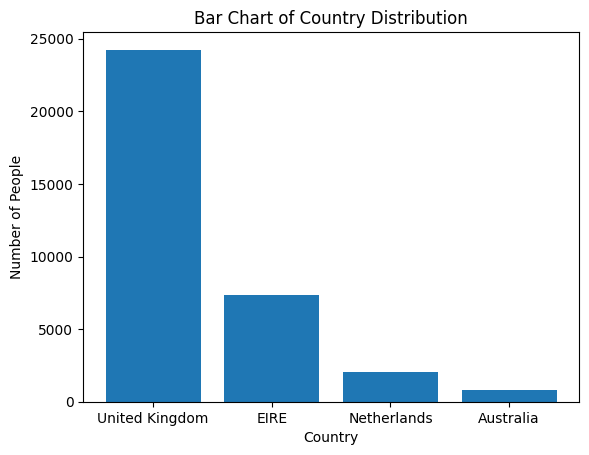

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

countries = filtered_df['Country'].unique()

counts = filtered_df['Country'].value_counts().sort_values(ascending=False)

ax.bar(countries, counts)

ax.set_title("Bar Chart of Country Distribution")
ax.set_xlabel("Country")
ax.set_ylabel("Number of People")

plt.show()


In [80]:
counts = filtered_df['Description'].unique()

#### NUMBER OF UNIQUE PRODUCTS  == 2983

In [81]:
counts.size

2983

In [82]:
counts_list=counts.tolist()

### Top 5 products mostly ordered

                            Description  Count
37              JUMBO BAG RED RETROSPOT    139
191            REGENCY CAKESTAND 3 TIER    129
51   WHITE HANGING HEART T-LIGHT HOLDER    111
401             LUNCH BAG RED RETROSPOT    107
38                        CHILLI LIGHTS    104


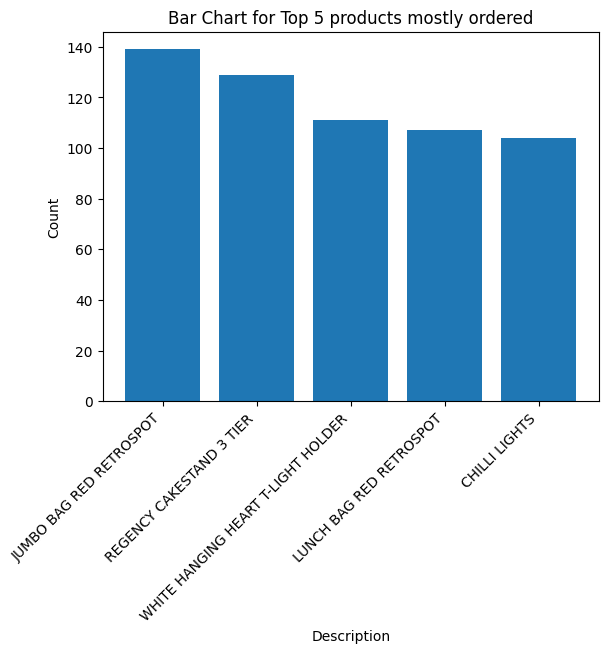

In [83]:
counts_dict = {}
for item in counts_list:
    count = filtered_df['Description'].value_counts().get(item, 0)
    counts_dict[item] = count


counts_df = pd.DataFrame(list(counts_dict.items()), columns=['Description', 'Count'])

counts_df=counts_df.sort_values(by='Count',ascending=False)
c_df=counts_df.head()
print(c_df)



description = c_df['Description'].unique()

count = c_df['Count']

fig, ax = plt.subplots()
ax.bar(description, count)

ax.set_title("Bar Chart for Top 5 products mostly ordered")
ax.set_xlabel("Description")
ax.set_ylabel("Count")

# Add back ticks to x labels

ax.set_xticks(range(len(description)))
ax.set_xticklabels(description, rotation=45, ha="right")

# Show the chart
plt.show()

## Country vs Total Price

C:\Users\nitin\AppData\Local\Temp\ipykernel_20868\2265009989.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




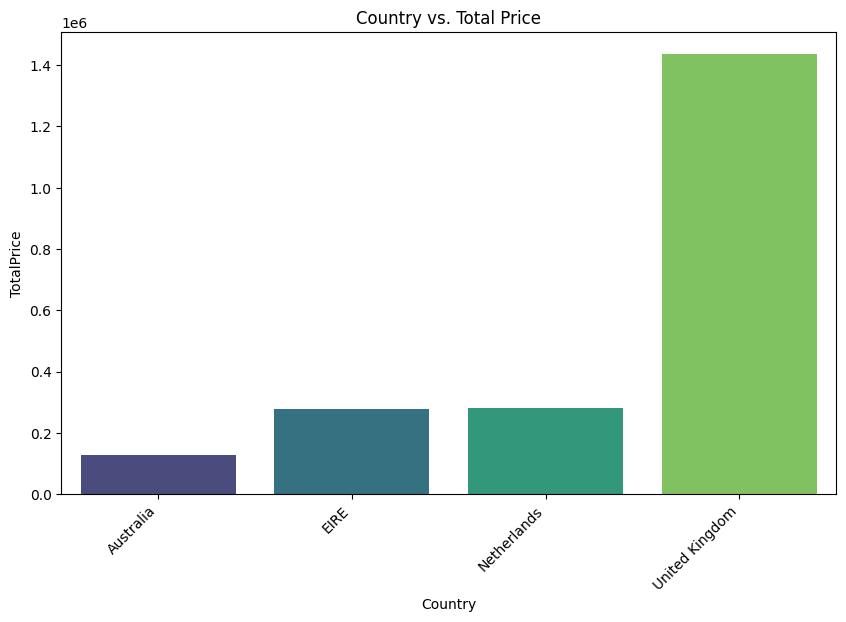

In [84]:
c=filtered_df.groupby('Country').agg({'TotalPrice':'sum'})
plt.figure(figsize=(10, 6))
sns.barplot(y='TotalPrice', x='Country', data=c, palette='viridis')
plt.xlabel('Country')
plt.ylabel('TotalPrice')
plt.title('Country vs. Total Price')
plt.xticks(rotation=45, ha='right')
plt.show()

## Time in a day when highest sales were recorded

In [85]:
df=filtered_df
df['Hour'] = df['InvoiceDate'].dt.hour

hour_with_highest_sales = df.groupby('Hour')['TotalPrice'].sum().idxmax()

highest_sales_time = df[df['Hour'] == hour_with_highest_sales]['InvoiceDate'].iloc[0].strftime('%H:%M')

print(f"The time of day with the highest sales : {highest_sales_time}")

The time of day with the highest sales : 09:41


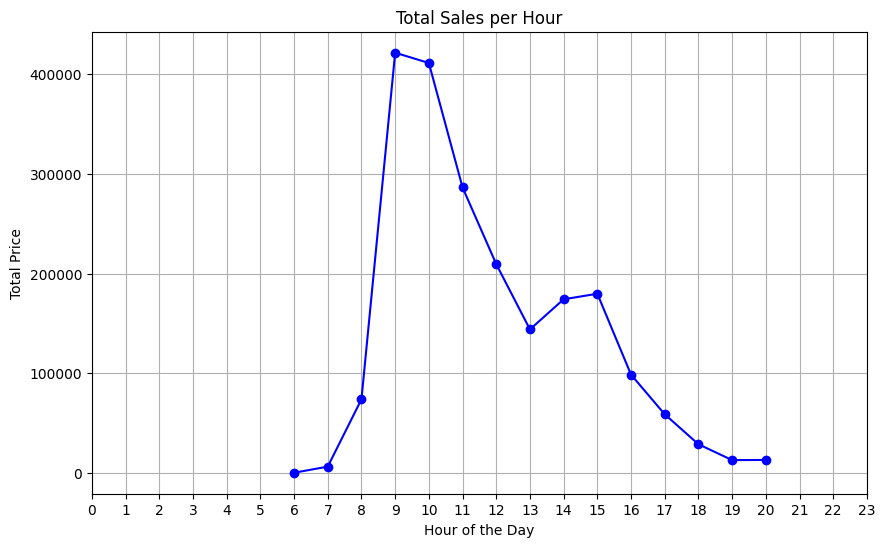

In [93]:
# Group filtered_df by hour and sum total price for each hour
df_grouped = filtered_df.groupby('Hour')['TotalPrice'].sum()

# Configure the plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(df_grouped.index, df_grouped.values, marker='o', linestyle='-', color='b')
plt.xlabel("Hour of the Day")
plt.ylabel("Total Price")
plt.title("Total Sales per Hour")

# Customize x-axis ticks for 24-hour format
plt.xticks(range(24)) 

# Add grid lines for better readability
plt.grid(True)

# Display the plot
plt.show()


## Total Amount Spent by each customer

In [86]:
c=filtered_df.groupby('CustomerID').agg({'TotalPrice':'sum'})
m=c['TotalPrice'].max()
k=c[c['TotalPrice']==m]
print(k)

            TotalPrice
CustomerID            
16446.0       336942.1


C:\Users\nitin\AppData\Local\Temp\ipykernel_20868\3382390769.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




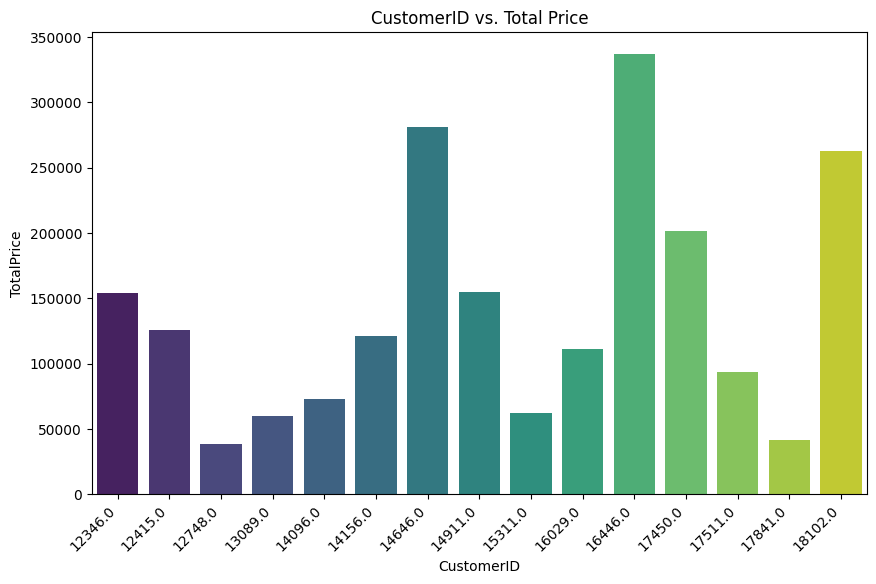

In [87]:
plt.figure(figsize=(10, 6))
sns.barplot(y='TotalPrice', x='CustomerID', data=c, palette='viridis')
plt.xlabel('CustomerID')
plt.ylabel('TotalPrice')
plt.title('CustomerID vs. Total Price')
plt.xticks(rotation=45, ha='right')
plt.show()

### Max Amount Spent was 336942.1 by cutomer with id : 166446

### Monthly Sales

In [88]:
filtered_df['YearMonth'] = filtered_df['InvoiceDate'].dt.to_period('M')

In [89]:
monthly_total_sales = filtered_df.groupby('YearMonth')['TotalPrice'].sum().reset_index()
print(monthly_total_sales)

   YearMonth  TotalPrice
0    2010-12    82982.17
1    2011-01   248756.56
2    2011-02    83594.45
3    2011-03   107812.45
4    2011-04    31983.33
5    2011-05   141833.69
6    2011-06   141406.97
7    2011-07   101174.64
8    2011-08   134437.62
9    2011-09   245956.75
10   2011-10   219645.64
11   2011-11   184650.74
12   2011-12   395706.14


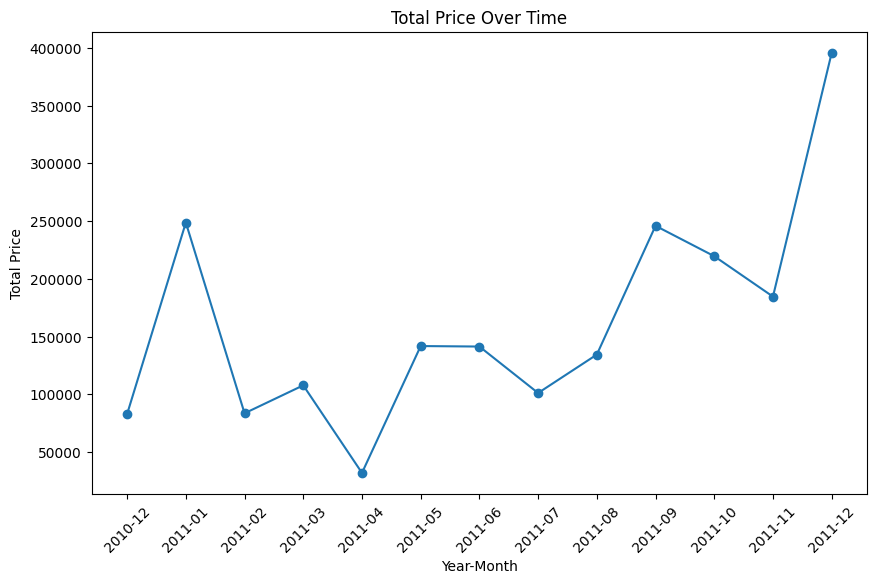

In [90]:
# Plotting
monthly_total_sales['YearMonth'] = monthly_total_sales['YearMonth'].astype(str)
yearmonth=monthly_total_sales['YearMonth']
total_price=monthly_total_sales['TotalPrice']
plt.figure(figsize=(10, 6))
plt.plot(yearmonth, total_price, marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Year-Month')
plt.ylabel('Total Price')
plt.title('Total Price Over Time')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

## Yearly Sales

In [91]:
filtered_df['Year'] =filtered_df['InvoiceDate'].dt.year

In [92]:
yearly_total_sales = filtered_df.groupby('Year')['TotalPrice'].sum().reset_index()
print(yearly_total_sales)

   Year  TotalPrice
0  2010    82982.17
1  2011  2036958.98
